In [72]:
import pickle
import numpy as np
from src.simulation import simulate_pre
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots


mpl.rcParams["lines.linewidth"] = 2.5
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["figure.figsize"] = (8,5)
mpl.rcParams["font.size"] = 13
# mpl.rcParams["legend.frameon"] = False
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.framealpha"] = 1


psi_0 = 0.010
psi_1 = 0.800
with open("./res_data/6damage/psi_0_0.010_psi_1_0.800/xi_a_1000.0_xi_g_1000.0/model_tech2_pre_damage", "rb") as f:
    data = pickle.load(f)

In [73]:
data["v0"].shape

(51, 26, 28)

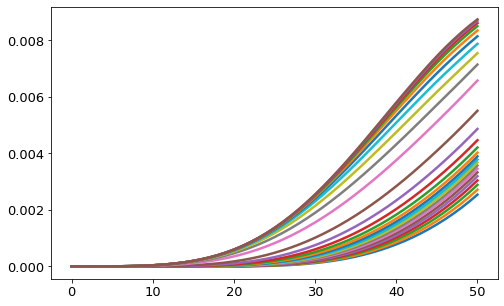

In [75]:
plt.plot(data["x_star"][:, :, 6])
plt.show()

In [80]:
delta = 0.01
alpha = 0.115
kappa = 6.667
mu_k  = -0.043
sigma_k = 0.0095
beta_f = 1.86/1000
sigma_y = 1.2 * 1.86 / 1000
zeta = 0.0

sigma_g = 0.016
gamma_1 = 1.7675 / 1000
gamma_2 = 0.0022 * 2
NUM_DAMAGE = 6
gamma_3_list = np.linspace(0., 1./3., NUM_DAMAGE)
y_bar = 2.
y_bar_lower = 1.5


# Tech
theta = 3
lambda_bar = 0.1206
vartheta_bar = 0.0453

lambda_bar_first = lambda_bar / 2.
vartheta_bar_first = vartheta_bar / 2.

lambda_bar_second = 1e-3
vartheta_bar_second = 0.

K_min = 4.00
K_max = 9.00
hK    = 0.20
K     = np.arange(K_min, K_max + hK, hK)
nK    = len(K)
Y_min = 0.
Y_max = 4.
hY    = 0.10 # make sure it is float instead of int
Y     = np.arange(Y_min, Y_max + hY, hY)
nY    = len(Y)
L_min = - 5.5
L_max = - 0.
hL    = 0.20
L     = np.arange(L_min, L_max,  hL)
nL    = len(L)


id_2 = np.abs(Y - y_bar).argmin()
Y_min_short = 0.
Y_max_short = 2.5
Y_short     = np.arange(Y_min_short, Y_max_short + hY, hY)
nY_short    = len(Y_short)

(K_mat, Y_mat, L_mat) = np.meshgrid(K, Y_short, L, indexing="ij")

In [82]:
np.exp(K[13])

735.0951892419746

In [35]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Surface(
    z=data["x_star"][:, :, 6] / alpha, x=np.exp(K_mat[:, :, 6]), y=Y_mat[:, :, 6],
    showscale=False,
    showlegend=True,
),)
fig.add_trace(go.Surface(z=data["e_star"][:, :, -10] / alpha, x=np.exp(K_mat[:, :, 6]), y=Y_mat[:, :, 6],
    showscale=False,
    showlegend=True,
                        ))
fig.update_scenes(
    xaxis_title_text='Capital',  
    yaxis_title_text='Temperature',  
    zaxis_title_text='R&D as % of GDP'
)
fig.update_layout(
    title="I_g = {:.3f}".format(np.exp(L[6]))
)
fig.show()

In [85]:
np.exp(L[6]), 

0.013568559012200946

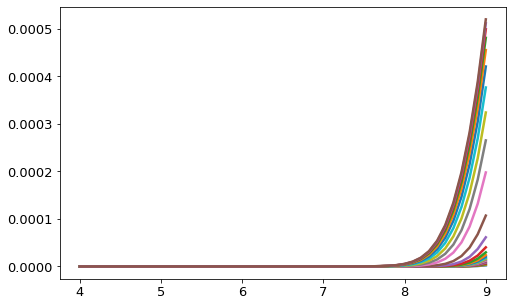

In [29]:
import matplotlib.pyplot as plt

plt.plot(K, data["x_star"][:, :, -5])
plt.show()

In [30]:
np.exp(L[6]), 1/80

(0.013568559012200946, 0.0125)

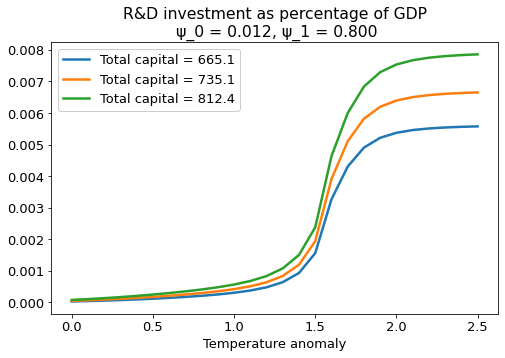

In [31]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()
plt.plot(Y_short, data["x_star"][20:23 , :, 6].T / alpha)
plt.xlabel("Temperature anomaly")
plt.title("R&D investment as percentage of GDP\n ψ_0 = {:.3f}, ψ_1 = {:.3f}".format(psi_0, psi_1))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(["Total capital = {:.1f}".format(np.exp(K[i])) for i in [25, 26, 27]])
# plt.savefig("figures/x_Y.pdf")
plt.show()

In [32]:
model_args = (delta, alpha, mu_k, kappa,sigma_k, beta_f, zeta, psi_0, psi_1, sigma_g, theta, lambda_bar, vartheta_bar)
i = data["i_star"]
e = data["e_star"]
x = data["x_star"]
pi_c = data["pi_c"]
g_tech = data["g_tech"]
g_damage =  data["g_damage"]
# g_damage = np.ones((1, nK, nY, nL))
simul1 = simulate_pre(grid = (K, Y_short, L), model_args = model_args, 
                    initial=(np.log(85/alpha), 1.1, np.log(1/80)),
                             controls = (i,e,x, g_tech, g_damage, pi_c), 
                             T0=0, T=50, dt=1,)


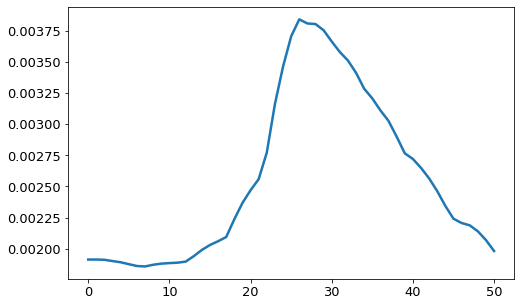

In [33]:
plt.plot(simul1["x"])

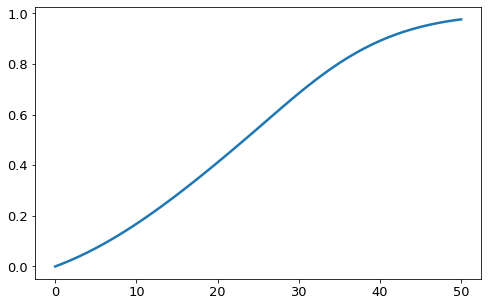

In [34]:
plt.plot(simul1["distorted_tech_prob"])

In [40]:
from src.supportfunctions import finiteDiff_3D

v0 = data["v0"]
dK = finiteDiff_3D(v0, 0, 1, hK)
dY = finiteDiff_3D(v0, 1, 1, hY)
dL = finiteDiff_3D(v0, 2, 1, hL)

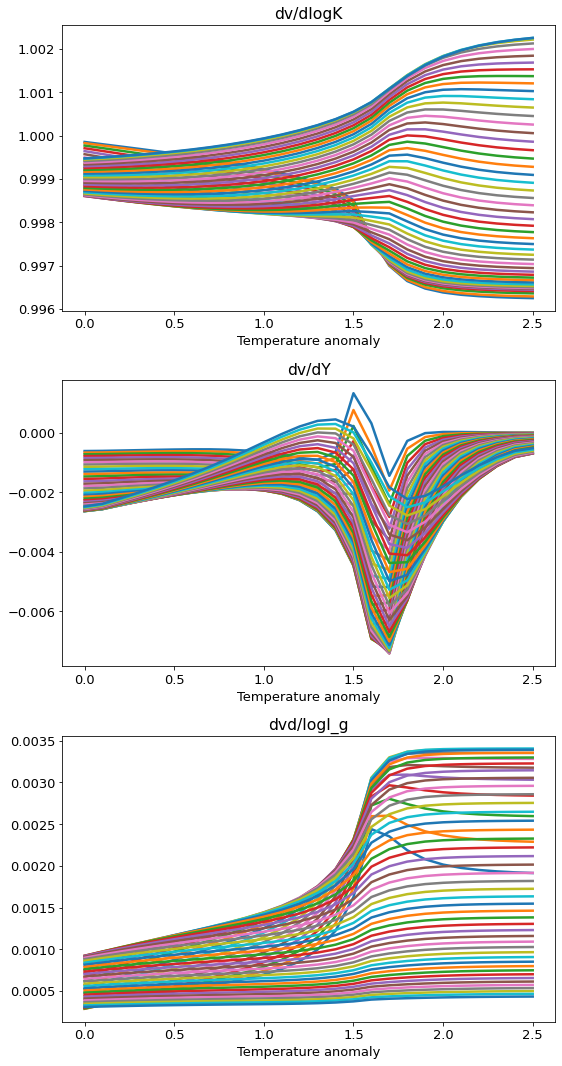

In [67]:
plt.figure(figsize=(8,15))
plt.subplot(311)
plt.plot(Y_short, dK[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("dv/dlogK")
# plt.show()

plt.subplot(312)
plt.plot(Y_short, dY[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("dv/dY")
# plt.show()

plt.subplot(313)
plt.plot(Y_short, dL[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("dvd/logI_g")

plt.tight_layout()
plt.savefig("FirstOrder.pdf")
plt.show()

In [45]:
ddK = finiteDiff_3D(v0, 0, 2, hK)
ddY = finiteDiff_3D(v0, 1, 2, hY)
ddL = finiteDiff_3D(v0, 2, 2, hL)

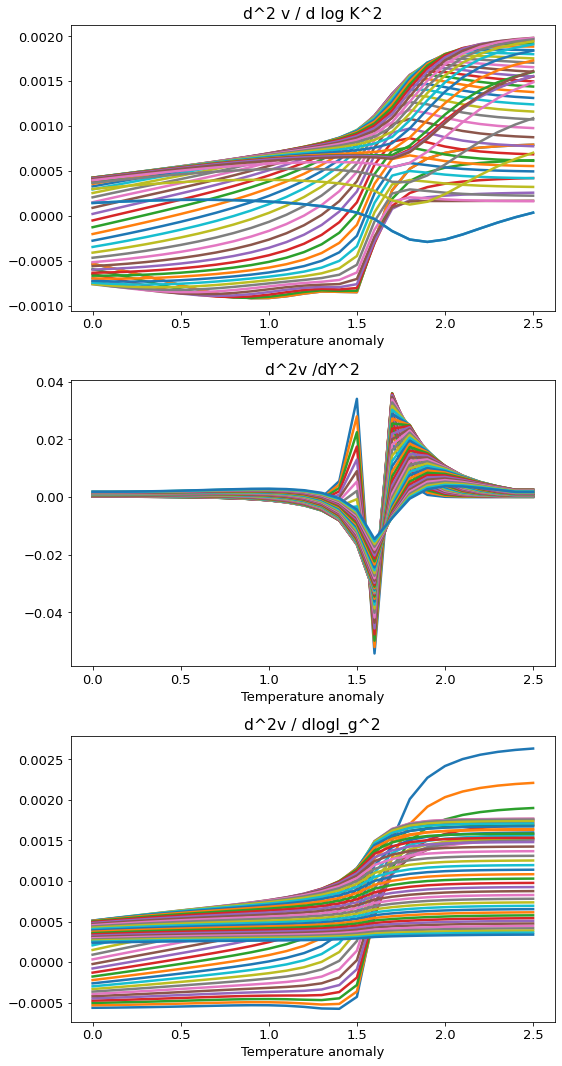

In [69]:
plt.figure(figsize=(8,15))
plt.subplot(311)
plt.plot(Y_short, ddK[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("d^2 v / d log K^2")
# plt.show()

plt.subplot(312)
plt.plot(Y_short, ddY[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("d^2v /dY^2")
# plt.show()

plt.subplot(313)
plt.plot(Y_short, ddL[:, :, 6].T)
plt.xlabel("Temperature anomaly")
plt.title("d^2v / dlogI_g^2")
plt.tight_layout()

plt.savefig("SecondOrder.pdf")
plt.show()

In [71]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Surface(
    z=dK[:, :, 6] / alpha, x=np.exp(K_mat[:, :, 6]), y=Y_mat[:, :, 6],
    showscale=False,
    showlegend=True,
    name="I_g = {:.3f}".format(np.exp(L[6]))
),)
fig.add_trace(go.Surface(z=dK[:, :, -10] / alpha, x=np.exp(K_mat[:, :, 6]), y=Y_mat[:, :, 6],
    showscale=False,
    showlegend=True,
    name="I_g = {:.3f}".format(np.exp(L[-10]))
))
fig.update_scenes(
    xaxis_title_text='Capital',  
    yaxis_title_text='Temperature',  
    zaxis_title_text='dv/dK'
)
fig.update_layout(
    title="First order deriative wrt log K"
)

fig.write_html("dK.html")
fig.show()